## Load the Dependendencies

In [1]:
# importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
# matplotlib graphs will be included in the notebook
import matplotlib.pyplot as plt

In [2]:
import ipywidgets as widgets 
from IPython.display import display

style = {'description_width': 'intial'}

In [3]:
file_name = "Salary_Data.csv"
dataset = pd.read_csv(file_name)

In [ ]:
# Dataset Description
There are two rows in the dataset
    1. **YearsExperience**
    2. **Salary**

In [4]:
#first 5 rows of the dataset
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columsn ")

Dataset has 30 rows and 2 columsn 


In [6]:
#plotting the relation between salary and experience

wig_col = widgets.Dropdown(
    options=dataset.columns.tolist(),
    description="Choose a Column to Plot vs. Slary",
    disabled=False,
    layout=widgets.Layout(widht='40%', height='40px'),
    style =style)

Dropdown(description='Choose a Column to Plot vs. Slary', layout=Layout(height='40px'), options=('YearsExperie…

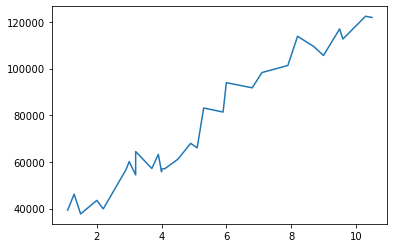

In [7]:
display(wig_col)
plt.plot(dataset[str(wig_col.value)], dataset['Salary'])

In [8]:
# classify dependent and independent variables
X = dataset.iloc[:,:-1].values # independent variable Years
y = dataset.iloc[:,-1].values # dependent variable salary

In [9]:
print("\n Independent Variable (Experience) :\n\n", X[:5])
print("\n Dependent Variable (Salary): \n\n", y[:5])


 Independent Variable (Experience) :

 [[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]

 Dependent Variable (Salary): 

 [39343. 46205. 37731. 43525. 39891.]


In [10]:
#create Train and Test Sets

from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=["Usually 20-30%"])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [11]:
# divide the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size.value, random_state= 0 )


In [12]:
print("Training set")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

Training set
X = 
 [[9.6]
 [4. ]
 [5.3]
 [7.9]
 [2.9]]
y = 
 [112635.  55794.  83088. 101302.  56642.]


In [13]:
print("Testing set")
print("X = \n", X_test[:5])
print("y = \n", y_test[:5])

Testing set
X = 
 [[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]]
y = 
 [ 37731. 122391.  57081.  63218. 116969.]


In [14]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (24, 1)
Shape of Testing set is (6, 1)


In [15]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

#configure params for the model

fit_int_wig = widgets.ToggleButtons(
                options=["True", "False"],
                description='Fit Intercept',
                disabled = False,
                style=style,
                tooltips=['whether to calculate the intercept for this model. If set to False, \
                no intercept will be used in calculations.'])
display(fit_int_wig)

norm_wig = widgets.ToggleButtons(
                values="False",
                options=["True", "False"],
                description='Normalize :',
                disabled=False,
                tooltips=['This parameter is ignored when fit_intercept is set to False. \
                If True, the regressor X will be normalized before regression by \
                subtracting the mean and dividing by the l2-norm'],
                style=style)
display(norm_wig)

njobs_wig =widgets.Dropdown(options=[('One', 1),('Two', 2), ('Three', 3), ('All Cores', -1)],
                             description="Number of CPU Cores = ", style=style)
display(njobs_wig)

ToggleButtons(description='Fit Intercept', options=('True', 'False'), style=ToggleButtonsStyle(description_wid…

ToggleButtons(description='Normalize :', options=('True', 'False'), style=ToggleButtonsStyle(description_width…

Dropdown(description='Number of CPU Cores = ', options=(('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1…

In [16]:
# Predict and Evaluate the Model
regressor = LinearRegression(fit_intercept=fit_int_wig.value, normalize=norm_wig.value,
                            n_jobs=njobs_wig.value)

# fit the linear model
regressor.fit(X_train, y_train)

#predict the outcome of the test sets
y_pred = regressor.predict(X_test)

print("\n Predictions = ", y_pred)


 Predictions =  [ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [17]:
from sklearn import metrics
print("Prediction Accuracy = ", metrics.r2_score(y_test, y_pred))


Prediction Accuracy =  0.988169515729126


In [18]:
# calculating the Actual and Predicted Salaries for the test set
print("\n Actual vs Predicted Salaries ")
error_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted" : y_pred,
    "Abs. Error" : np.abs(y_test-y_pred)
    
})
error_df


 Actual vs Predicted Salaries 


,Actual,Predicted,Abs. Error
0,37731.0,40748.961841,3017.961841
1,122391.0,122699.622956,308.622956
2,57081.0,64961.657170,7880.657170
3,63218.0,63099.142145,118.857855
4,116969.0,115249.562855,1719.437145
5,109431.0,107799.502753,1631.497247


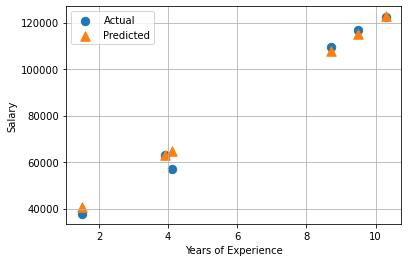

In [19]:
#Plotting Actual observation vs Predictions
plt.scatter(X_test,y_test, s = 70, label='Actual')
plt.scatter(X_test,y_pred, s = 90, marker = '^', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend();
plt.grid();
plt.show();

In [20]:
# Different Regression metrics

from sklearn.metrics import mean_squared_error

print(f"Root mean squared error : {mean_squared_error(y_true=y_test, y_pred=y_pred)}")
print(f"Root mean squared error : {mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)}")

Root mean squared error : 12823412.298126606
Root mean squared error : 3580.9792373213513


In [21]:
# 1. Explained variance score
from sklearn.metrics import explained_variance_score

print(f"{explained_variance_score(y_test, y_pred)}")  # default value of mulltiouput : 'uniform_average'
print(f"{explained_variance_score(y_test, y_pred, multioutput='raw_values')}")
print(f"{explained_variance_score(y_test, y_pred, multioutput= 'variance_weighted')}")

# multiouput -> defines aggregating of mulitple output scores
#  1. 'raw_values' -> returns a full set of scores in case of multiouput input.
#  2. 'uniform_average' -> Scores all output are averaged with uniform weight.
#  3. 'variance_weighted' -> Scores of all output are averaged, weighted by the variances of each inddividual output.




0.989703751469354
[0.98970375]
0.989703751469354


In [22]:
# 2. Max Error 
from sklearn.metrics import max_error
max_error(y_test, y_pred)

7880.657170217855